<h1 align="center">Volume 4: Inverse Problems.</h1>

    NAME
    Section #
    DATE

In [11]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.optimize import minimize

# Problem 1

Solve (16.2) for a(x).
Produce the plot shown in Figure 16.2.

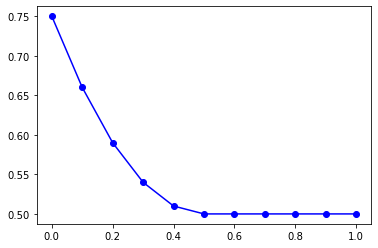

In [27]:
def f(x):
    if x <= 1/2:
        return -6*x**2 + 3*x - 1
    else:
        return -1
def F(x):
    if x <= 1/2:
        return -x + 3*(x**2)/2 - 2*x**3
    else:
        # Integral of everything before 1/2
        # Then add on the -1 * how much is left
        return -(1/2) + 3*((1/2)**2)/2 - 2*(1/2)**3 - (x - 1/2)

c0 = 3/8
u = lambda x: x**2 + x/2 + 5/16
u_p = lambda x: 2*x + 1/2

xjs = [.1*j for j in range(11)]
alpha_js = []

for xj in xjs:
    to_min = lambda alpha: ((c0 - F(xj))/alpha - u_p(xj))**2
    alpha_js.append(minimize(to_min, .01).x)
    
    
plt.plot(xjs, alpha_js, marker='o', c='blue')
plt.show()

# Problem 2

Find the density function a(x). Using several values of ε > 0.66049142, plot the corresponding
density a(x) for x in np.linspace(0,1,11) to demonstrate that the problem is ill-posed.

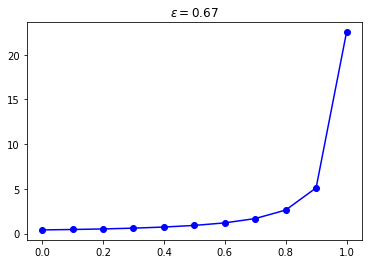

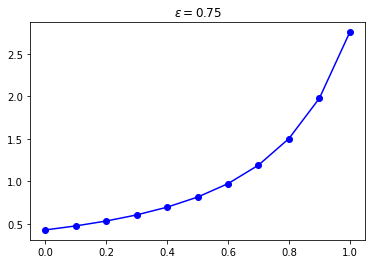

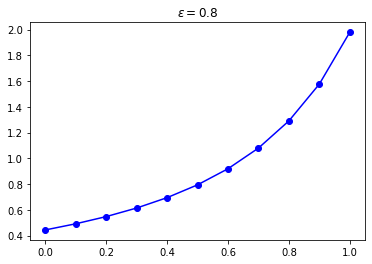

In [32]:
f = lambda x: -1
F = lambda x: -x
c0 = 1
c1 = 2

for eps in [.67, .75, .8]:
    u = lambda x: x + 1 + eps*np.sin((eps**(-2))*x)
    u_p = lambda x: 1 + np.cos((eps**(-2))*x) / eps
    
    xjs = np.linspace(0, 1, 11)
    alpha_js = []
    for xj in xjs:
        to_min = lambda alpha: ((c0 - F(xj))/alpha - u_p(xj))**2
        alpha_js.append(minimize(to_min, .01).x)

    plt.plot(xjs, alpha_js, marker='o', c='blue')
    plt.title(r"$\epsilon = {}$".format(eps))
    plt.show()